# Exploratory Data Analysis

In this notebook, I'll conduct EDA on the dataset to understand the following:
- Descriptive Analytics - What dataset am I dealing with and who are these users?
- Diagnostics Analytics - Why are the users churning?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

## Preprocessing Data

I'll load the dataset, clean it up and slice them to facilitate simple descriptive analytics

In [4]:
# df = pd.read_excel('../data/Customer-Churn.xlsx')
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

In [20]:
# Drop irrelevant attributes
df1 = df.drop(['customerID'],axis=1)

# Convert empty strings to none values
df1['TotalCharges'] = df1['TotalCharges'].replace(" ",None).dropna().apply(lambda x:float(x))

print(f"""
Number of Attributes: {len(df.columns)} 
NUmber of Observations: {len(df)} 
Number of Unique Users: {df.customerID.nunique()}
""")

df1.head()


Number of Attributes: 21 
NUmber of Observations: 7043 
Number of Unique Users: 7043



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


There are quite a few attributes within the dataset, 30 to be exact. I'll drop those that are not relevant to us.

*CustomerID*: Since the dataset has 7043 rows, and the number of unique CustomerID are 7043, this mean that each row is a unique user and 'CustomerID' is irrelevant to us for futher exploration.

## Descriptive Analytics

I'll first observe the ratio of churn outcomes, our dependent variable. If the count of either class is much higher than the other, that means we have a classic case of class imbalance, something quite common in churn predictions.

<AxesSubplot:xlabel='Churn', ylabel='Count'>

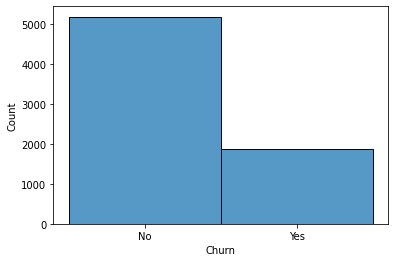

In [34]:
sns.histplot(data=df1, x='Churn')

Plotting categorical variables to look at variation of users who churn within these categories

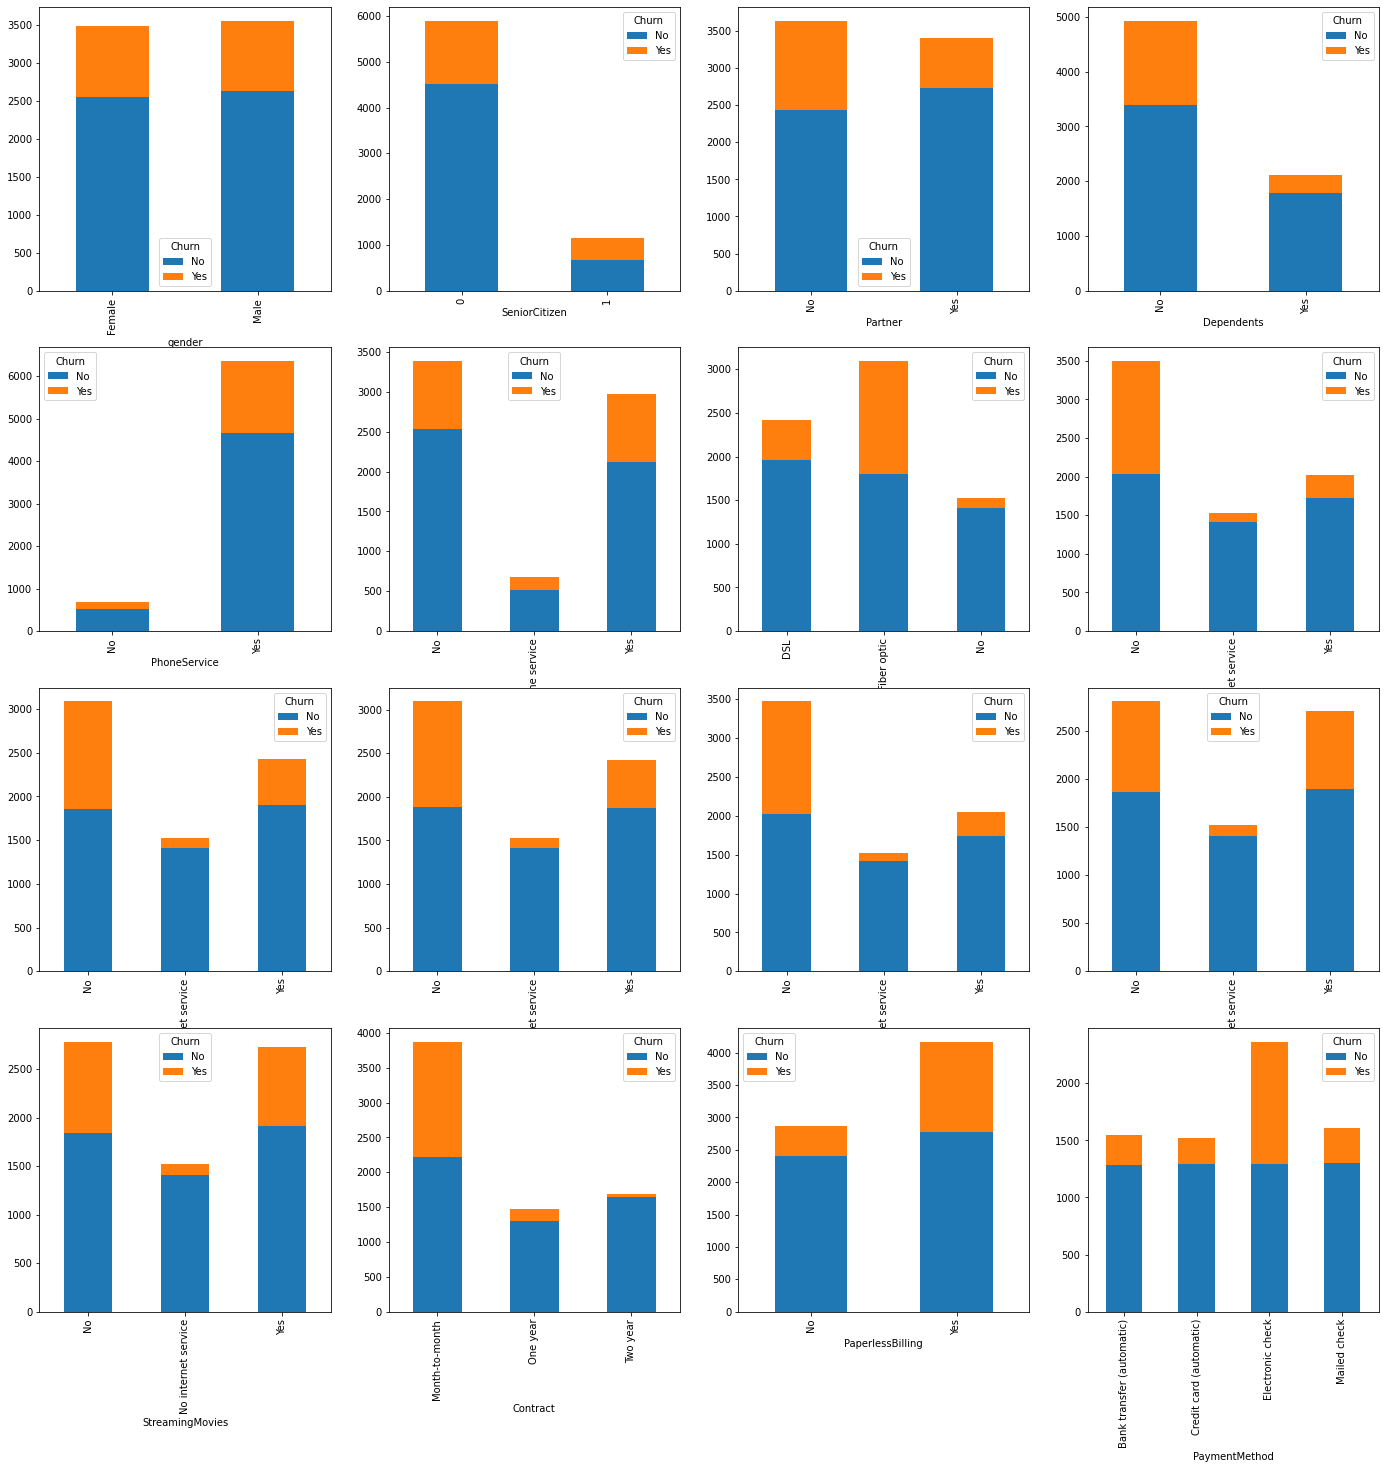

In [24]:
cat_covariates = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(4, 4, sharey=False, figsize=(24,24))

for i in enumerate(cat_covariates[:4]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[0,i[0]])

for i in enumerate(cat_covariates[4:8]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[1,i[0]])

for i in enumerate(cat_covariates[8:12]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[2,i[0]])

for i in enumerate(cat_covariates[12:]):
    df1.groupby(by=[i[1],'Churn']).size().unstack().plot(kind='bar',stacked=True,ax=axes[3,i[0]])

Plotting continous variables to look at variation of users who churned

In [25]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

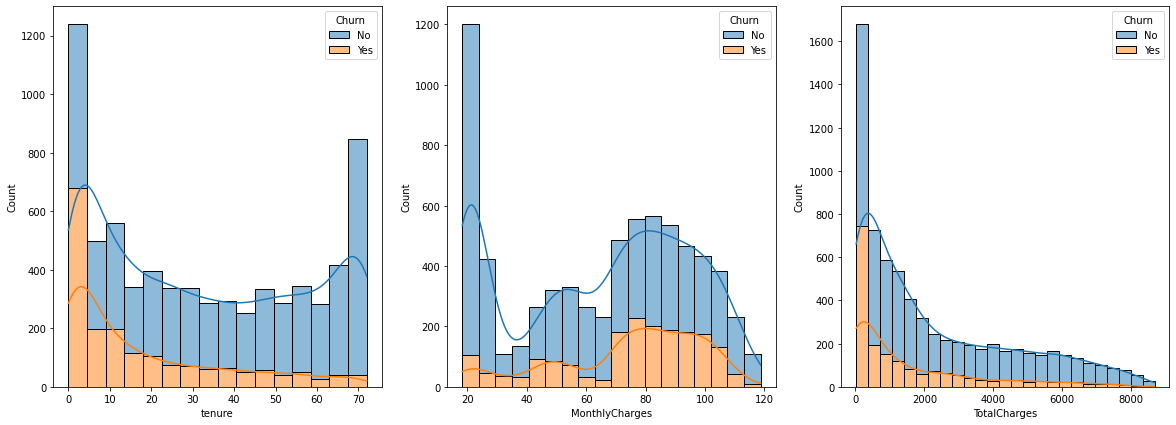

In [27]:
cont_covariates = ['tenure','MonthlyCharges','TotalCharges']

fig, axes = plt.subplots(1,3, sharey=False, figsize=(20,7))

for i in enumerate(cont_covariates):
    sns.histplot(data=df1, x=df1[i[1]], multiple="stack", hue=df1['Churn'], kde=True, ax=axes[i[0]]);


## Discussion Points

Looking at the descriptive exploration of categorical and continuous independent variables against the dependent variable (churn), we can observe that most of the variables have substantial variable and hence are potentially good predictors of churn. We will proceed to use all of these features for our modelling. 